`PPO Vanilla Implementation`
source: https://github.com/ericyangyu/PPO-for-Beginners

In [ ]:
## ENSURE THAT PYTHON VERSION IS >=3.9 for requirements.txt to work properly
## IF RUNNING ON COLAB, SET TO TRUE
running_on_colab = False

if running_on_colab:
    from google.colab import drive
    drive.flush_and_unmount()
    drive.mount('/content/drive')
    ## For shared folders, go to the shared folder_name, right click, organize add shortcut, all locations, My Drive
    folder_path = "/content/drive/path/to/your/drive/folder"
    %cd folder_path

    ## The below folder path is for our team's shared drive folder. All others please comment this out.
    folder_path = "/content/drive/My Drive/DRL_Project/Project_Files/"
    %cd folder_path
else:
    import os
    folder_path = os.getcwd()
    %cd folder_path

In [ ]:
!pip install -r requirements.txt

In [3]:
%load_ext autoreload
%autoreload 2

In [ ]:
%pip install "gymnasium[mujoco]"

In [9]:
import gymnasium as gym
import sys
import torch

from custom_ppo import PPO
from eval_policy import eval_policy

In [10]:
class DictObject:
    def __init__(self, d=None):
        if d is not None:
            for key, value in d.items():
                setattr(self, key, value)


In [12]:
def train(timesteps, env, hyperparameters):
	print(f"Training starting...", flush=True)

	model = PPO(env=env, **hyperparameters)
	metadata = model.learn(total_timesteps=timesteps)

	return metadata


In [13]:
def main(args):
	hyperparameters = {
		'timesteps_per_batch': 2048,
		'max_timesteps_per_episode': 200,
		'gamma': 0.99,
		'n_updates_per_iteration': 10,
		'lr': 3e-4,
		'clip': 0.2,
		'render': False,
		'render_every_i': 10,
		'actor_save_path': f"'{args.actor_save_path}'",
		'critic_save_path': f"'{args.critic_save_path}'",
		'use_checkpoints': args.use_checkpoints
	}

	env = gym.make(args.env, render_mode='rgb_array')

	metadata = train(timesteps=args.timesteps, env=env, hyperparameters=hyperparameters)
	return metadata

In [14]:
import matplotlib.pyplot as plt
def graph_metadata(metadata):
  timesteps = [entry['timesteps'] for entry in metadata]
  avg_rewards = [entry['average_episode_rewards'] for entry in metadata]
  avg_loss = [entry['avg_actor_loss'] for entry in metadata]


  plt.figure(figsize=(8, 6))
  plt.plot(timesteps, avg_rewards, marker='o', linestyle='-', label='Average Episode Reward')
  plt.title("Average Episode Reward vs. Timesteps")
  plt.xlabel("Timesteps")
  plt.ylabel("Average Episode Reward")
  plt.grid(True)
  plt.legend()
  plt.tight_layout()
  plt.show()

  plt.figure(figsize=(8, 6))
  plt.plot(timesteps, avg_loss, marker='o', linestyle='-', color='r', label='Average Actor Loss')
  plt.title("Average Actor Loss vs. Timesteps")
  plt.xlabel("Timesteps")
  plt.ylabel("Average Actor Loss")
  plt.grid(True)
  plt.legend()
  plt.tight_layout()
  plt.show()

Matplotlib is building the font cache; this may take a moment.


/Users/nityam/dev/miniconda3/envs/drl_ppo/lib/python3.10/site-packages/gymnasium/envs/registration.py:519: DeprecationWarning: WARN: The environment HalfCheetah-v4 is out of date. You should consider upgrading to version `v5`.
  logger.deprecation(


Training starting...
Learning... Running 200 timesteps per episode, 2048 timesteps per batch for a total of 200000 timesteps


/Users/nityam/GT/CS 8803 DRL/ppo-delta/ppo-implementation/custom_ppo.py:139: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:257.)
  batch_obs = torch.tensor(batch_obs, dtype=torch.float)


Saved models to /Users/nityam/GT/CS 8803 DRL/ppo-delta/ppo-implementationHalfCheetah_ppo_actor.pth and /Users/nityam/GT/CS 8803 DRL/ppo-delta/ppo-implementationHalfCheetah_ppo_critic.pth
Saved models to /Users/nityam/GT/CS 8803 DRL/ppo-delta/ppo-implementationHalfCheetah_ppo_actor.pth and /Users/nityam/GT/CS 8803 DRL/ppo-delta/ppo-implementationHalfCheetah_ppo_critic.pth
Saved models to /Users/nityam/GT/CS 8803 DRL/ppo-delta/ppo-implementationHalfCheetah_ppo_actor.pth and /Users/nityam/GT/CS 8803 DRL/ppo-delta/ppo-implementationHalfCheetah_ppo_critic.pth
Saved models to /Users/nityam/GT/CS 8803 DRL/ppo-delta/ppo-implementationHalfCheetah_ppo_actor.pth and /Users/nityam/GT/CS 8803 DRL/ppo-delta/ppo-implementationHalfCheetah_ppo_critic.pth
Saved models to /Users/nityam/GT/CS 8803 DRL/ppo-delta/ppo-implementationHalfCheetah_ppo_actor.pth and /Users/nityam/GT/CS 8803 DRL/ppo-delta/ppo-implementationHalfCheetah_ppo_critic.pth
Saved models to /Users/nityam/GT/CS 8803 DRL/ppo-delta/ppo-implem

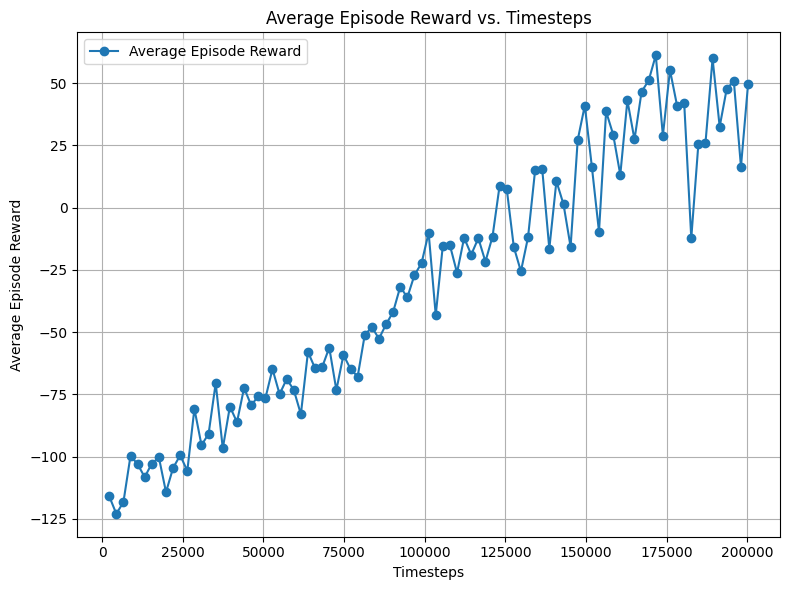

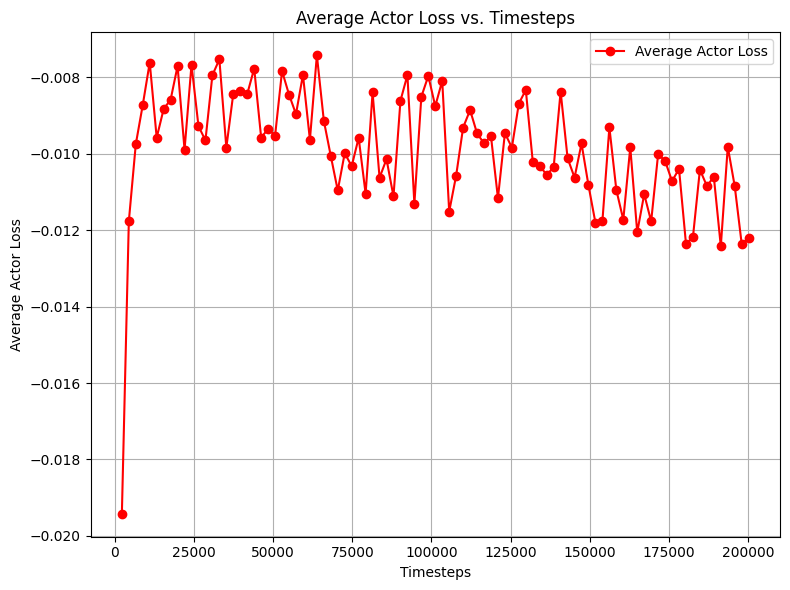

In [15]:
## TRAINING ON HALF-CHEETAH TO MAKE SURE CODE WORKS AS INTENDED
args = {
    'env': 'HalfCheetah-v4',
    'actor_save_path': folder_path + 'HalfCheetah_ppo_actor.pth',
    'critic_save_path': folder_path + 'HalfCheetah_ppo_critic.pth',
    'use_checkpoints': False,
    'timesteps': 200_000
}

args = DictObject(args)
cheetah_metadata = main(args)
graph_metadata(cheetah_metadata)

In [16]:
environments = {
    "HalfCheetah": (17, 6, "HalfCheetah-v4"),
    "Hopper": (11, 3, "Hopper-v4"),
    "InvertedDoublePendulum":(9, 1, "InvertedDoublePendulum-v4"),
    "InvertedPendulum":(4, 1, "InvertedPendulum-v4"),
    "Reacher":(10, 2, "Reacher-v4"),
    "Swimmer":(8, 2, "Swimmer-v4"),
    "Walker2d":(17, 6, "Walker2d-v4"),
}

env_args = {}
for env_name, (obs_dim, action_dim, env_version) in environments.items():
    args = {
        'env': env_version,
        'actor_save_path': f'{folder_path}{env_name}_ppo_actor.pth',
        'critic_save_path': f'{folder_path}{env_name}_ppo_critic.pth',
        'use_checkpoints': False,
        'timesteps': 1e6
    }

    env_args[env_name] = DictObject(args)

Training starting...
Learning... Running 200 timesteps per episode, 2048 timesteps per batch for a total of 1000000.0 timesteps
Saved models to /Users/nityam/GT/CS 8803 DRL/ppo-delta/ppo-implementationHalfCheetah_ppo_actor.pth and /Users/nityam/GT/CS 8803 DRL/ppo-delta/ppo-implementationHalfCheetah_ppo_critic.pth
Saved models to /Users/nityam/GT/CS 8803 DRL/ppo-delta/ppo-implementationHalfCheetah_ppo_actor.pth and /Users/nityam/GT/CS 8803 DRL/ppo-delta/ppo-implementationHalfCheetah_ppo_critic.pth
Saved models to /Users/nityam/GT/CS 8803 DRL/ppo-delta/ppo-implementationHalfCheetah_ppo_actor.pth and /Users/nityam/GT/CS 8803 DRL/ppo-delta/ppo-implementationHalfCheetah_ppo_critic.pth
Saved models to /Users/nityam/GT/CS 8803 DRL/ppo-delta/ppo-implementationHalfCheetah_ppo_actor.pth and /Users/nityam/GT/CS 8803 DRL/ppo-delta/ppo-implementationHalfCheetah_ppo_critic.pth
Saved models to /Users/nityam/GT/CS 8803 DRL/ppo-delta/ppo-implementationHalfCheetah_ppo_actor.pth and /Users/nityam/GT/CS 8

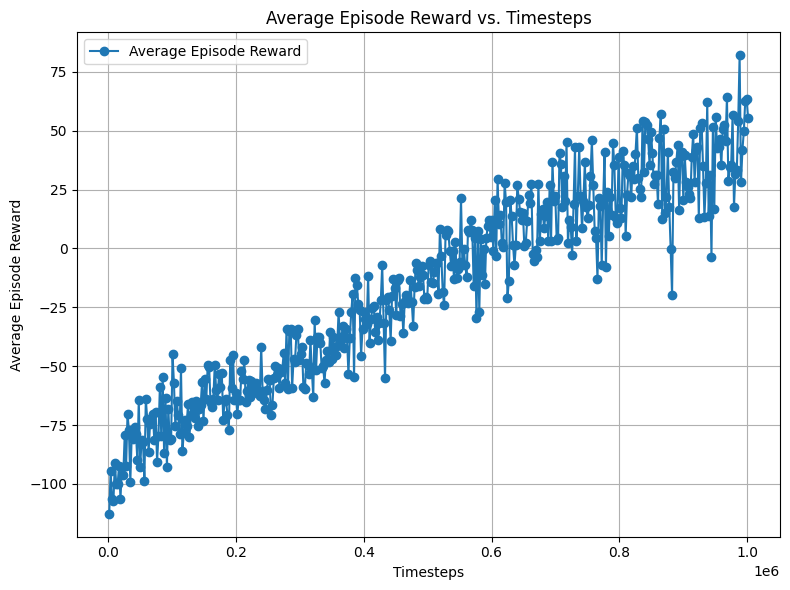

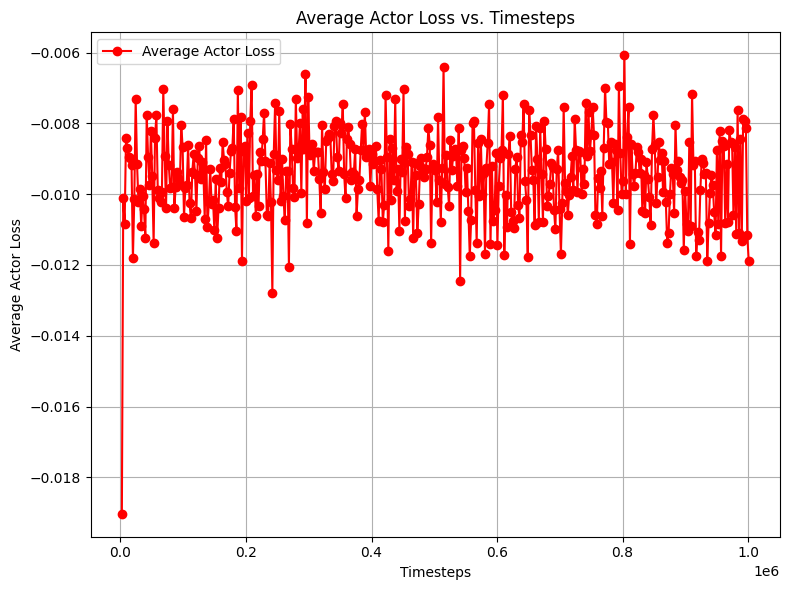

In [18]:
args = env_args["HalfCheetah"]
metadata = main(args)
graph_metadata(metadata)

Training starting...


/Users/nityam/dev/miniconda3/envs/drl_ppo/lib/python3.10/site-packages/gymnasium/envs/registration.py:519: DeprecationWarning: WARN: The environment Hopper-v4 is out of date. You should consider upgrading to version `v5`.
  logger.deprecation(


Learning... Running 200 timesteps per episode, 2048 timesteps per batch for a total of 1000000.0 timesteps
Saved models to /Users/nityam/GT/CS 8803 DRL/ppo-delta/ppo-implementationHopper_ppo_actor.pth and /Users/nityam/GT/CS 8803 DRL/ppo-delta/ppo-implementationHopper_ppo_critic.pth
Saved models to /Users/nityam/GT/CS 8803 DRL/ppo-delta/ppo-implementationHopper_ppo_actor.pth and /Users/nityam/GT/CS 8803 DRL/ppo-delta/ppo-implementationHopper_ppo_critic.pth
Saved models to /Users/nityam/GT/CS 8803 DRL/ppo-delta/ppo-implementationHopper_ppo_actor.pth and /Users/nityam/GT/CS 8803 DRL/ppo-delta/ppo-implementationHopper_ppo_critic.pth
Saved models to /Users/nityam/GT/CS 8803 DRL/ppo-delta/ppo-implementationHopper_ppo_actor.pth and /Users/nityam/GT/CS 8803 DRL/ppo-delta/ppo-implementationHopper_ppo_critic.pth
Saved models to /Users/nityam/GT/CS 8803 DRL/ppo-delta/ppo-implementationHopper_ppo_actor.pth and /Users/nityam/GT/CS 8803 DRL/ppo-delta/ppo-implementationHopper_ppo_critic.pth
Saved mo

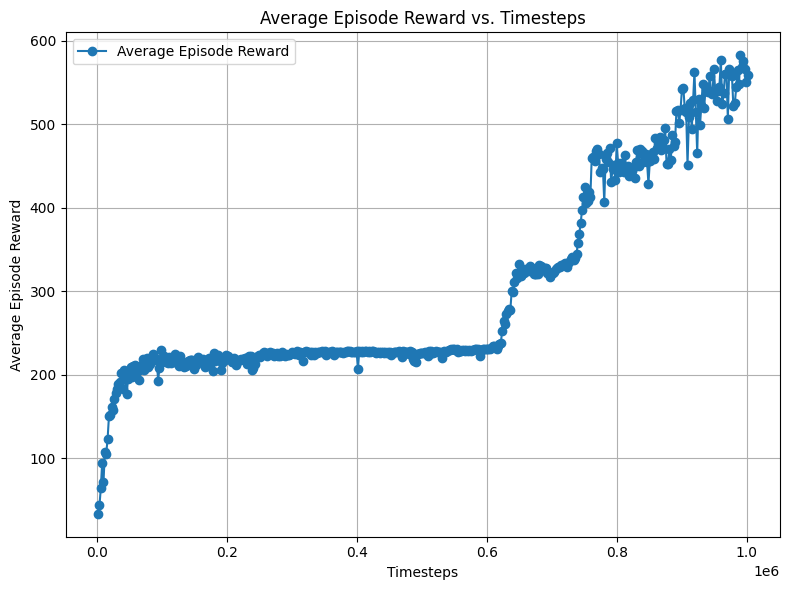

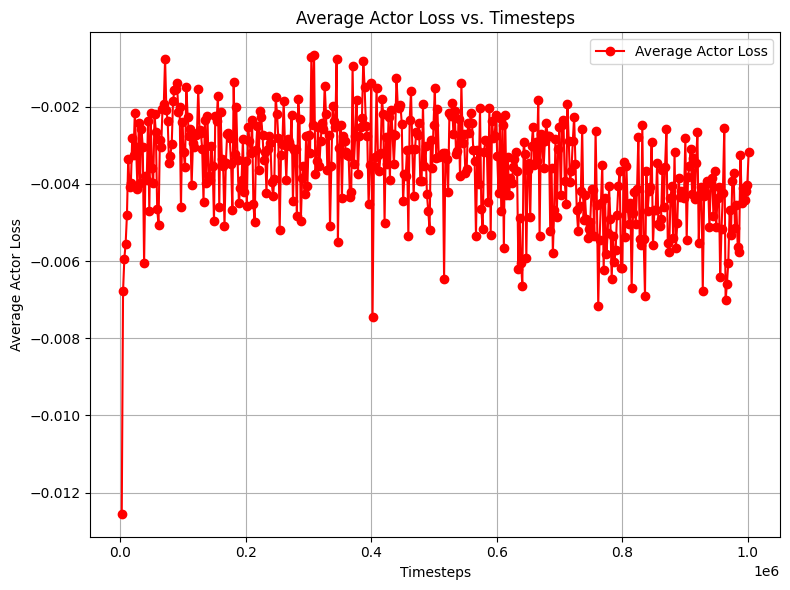

In [19]:
args = env_args["Hopper"]
metadata = main(args)
graph_metadata(metadata)

Training starting...


/Users/nityam/dev/miniconda3/envs/drl_ppo/lib/python3.10/site-packages/gymnasium/envs/registration.py:519: DeprecationWarning: WARN: The environment InvertedDoublePendulum-v4 is out of date. You should consider upgrading to version `v5`.
  logger.deprecation(


Learning... Running 200 timesteps per episode, 2048 timesteps per batch for a total of 1000000.0 timesteps
Saved models to /Users/nityam/GT/CS 8803 DRL/ppo-delta/ppo-implementationInvertedDoublePendulum_ppo_actor.pth and /Users/nityam/GT/CS 8803 DRL/ppo-delta/ppo-implementationInvertedDoublePendulum_ppo_critic.pth
Saved models to /Users/nityam/GT/CS 8803 DRL/ppo-delta/ppo-implementationInvertedDoublePendulum_ppo_actor.pth and /Users/nityam/GT/CS 8803 DRL/ppo-delta/ppo-implementationInvertedDoublePendulum_ppo_critic.pth
Saved models to /Users/nityam/GT/CS 8803 DRL/ppo-delta/ppo-implementationInvertedDoublePendulum_ppo_actor.pth and /Users/nityam/GT/CS 8803 DRL/ppo-delta/ppo-implementationInvertedDoublePendulum_ppo_critic.pth
Saved models to /Users/nityam/GT/CS 8803 DRL/ppo-delta/ppo-implementationInvertedDoublePendulum_ppo_actor.pth and /Users/nityam/GT/CS 8803 DRL/ppo-delta/ppo-implementationInvertedDoublePendulum_ppo_critic.pth
Saved models to /Users/nityam/GT/CS 8803 DRL/ppo-delta/pp

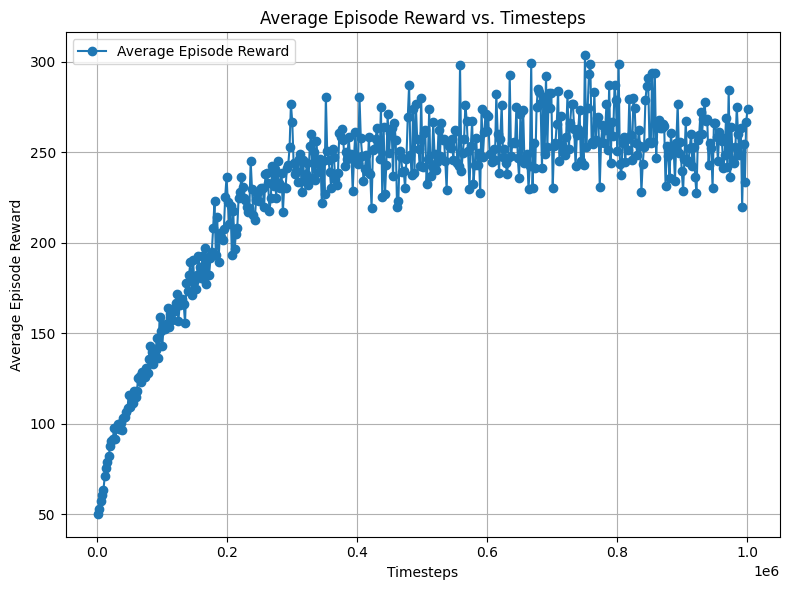

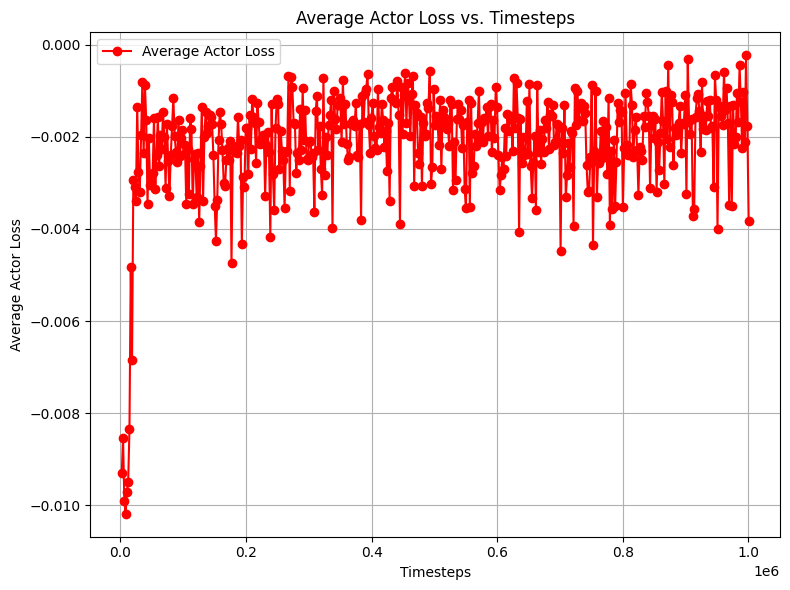

In [20]:
args = env_args["InvertedDoublePendulum"]
metadata = main(args)
graph_metadata(metadata)

Training starting...


/Users/nityam/dev/miniconda3/envs/drl_ppo/lib/python3.10/site-packages/gymnasium/envs/registration.py:519: DeprecationWarning: WARN: The environment InvertedPendulum-v4 is out of date. You should consider upgrading to version `v5`.
  logger.deprecation(


Learning... Running 200 timesteps per episode, 2048 timesteps per batch for a total of 1000000.0 timesteps
Saved models to /Users/nityam/GT/CS 8803 DRL/ppo-delta/ppo-implementationInvertedPendulum_ppo_actor.pth and /Users/nityam/GT/CS 8803 DRL/ppo-delta/ppo-implementationInvertedPendulum_ppo_critic.pth
Saved models to /Users/nityam/GT/CS 8803 DRL/ppo-delta/ppo-implementationInvertedPendulum_ppo_actor.pth and /Users/nityam/GT/CS 8803 DRL/ppo-delta/ppo-implementationInvertedPendulum_ppo_critic.pth
Saved models to /Users/nityam/GT/CS 8803 DRL/ppo-delta/ppo-implementationInvertedPendulum_ppo_actor.pth and /Users/nityam/GT/CS 8803 DRL/ppo-delta/ppo-implementationInvertedPendulum_ppo_critic.pth
Saved models to /Users/nityam/GT/CS 8803 DRL/ppo-delta/ppo-implementationInvertedPendulum_ppo_actor.pth and /Users/nityam/GT/CS 8803 DRL/ppo-delta/ppo-implementationInvertedPendulum_ppo_critic.pth
Saved models to /Users/nityam/GT/CS 8803 DRL/ppo-delta/ppo-implementationInvertedPendulum_ppo_actor.pth a

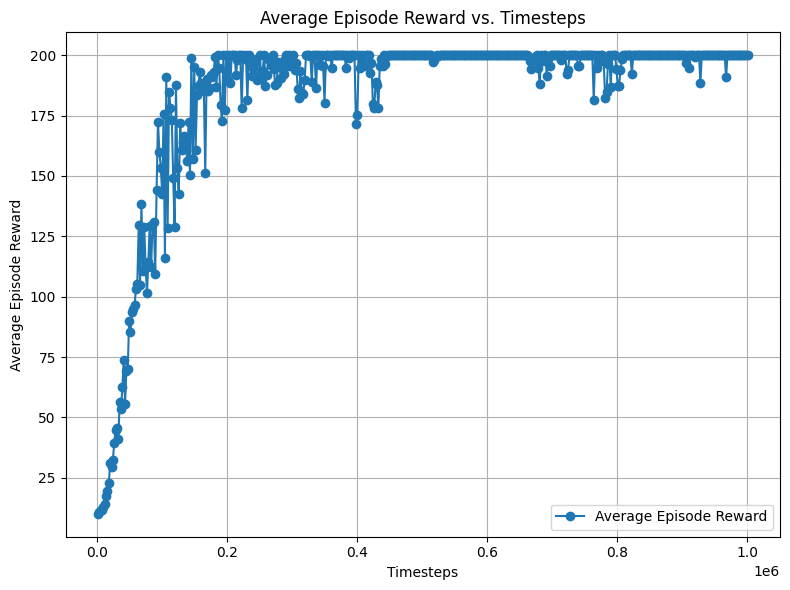

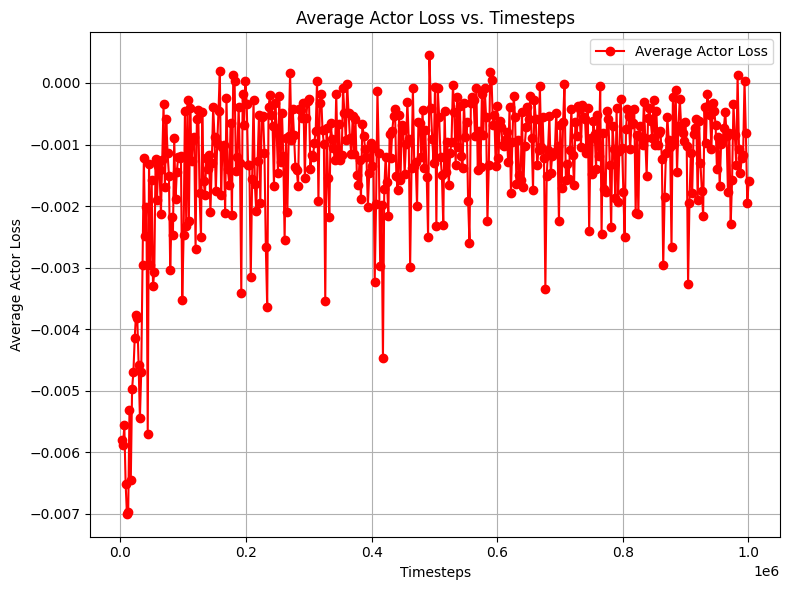

In [21]:
args = env_args["InvertedPendulum"]
metadata = main(args)
graph_metadata(metadata)

Training starting...


/Users/nityam/dev/miniconda3/envs/drl_ppo/lib/python3.10/site-packages/gymnasium/envs/registration.py:519: DeprecationWarning: WARN: The environment Reacher-v4 is out of date. You should consider upgrading to version `v5`.
  logger.deprecation(


Learning... Running 200 timesteps per episode, 2048 timesteps per batch for a total of 1000000.0 timesteps
Saved models to /Users/nityam/GT/CS 8803 DRL/ppo-delta/ppo-implementationReacher_ppo_actor.pth and /Users/nityam/GT/CS 8803 DRL/ppo-delta/ppo-implementationReacher_ppo_critic.pth
Saved models to /Users/nityam/GT/CS 8803 DRL/ppo-delta/ppo-implementationReacher_ppo_actor.pth and /Users/nityam/GT/CS 8803 DRL/ppo-delta/ppo-implementationReacher_ppo_critic.pth
Saved models to /Users/nityam/GT/CS 8803 DRL/ppo-delta/ppo-implementationReacher_ppo_actor.pth and /Users/nityam/GT/CS 8803 DRL/ppo-delta/ppo-implementationReacher_ppo_critic.pth
Saved models to /Users/nityam/GT/CS 8803 DRL/ppo-delta/ppo-implementationReacher_ppo_actor.pth and /Users/nityam/GT/CS 8803 DRL/ppo-delta/ppo-implementationReacher_ppo_critic.pth
Saved models to /Users/nityam/GT/CS 8803 DRL/ppo-delta/ppo-implementationReacher_ppo_actor.pth and /Users/nityam/GT/CS 8803 DRL/ppo-delta/ppo-implementationReacher_ppo_critic.pt

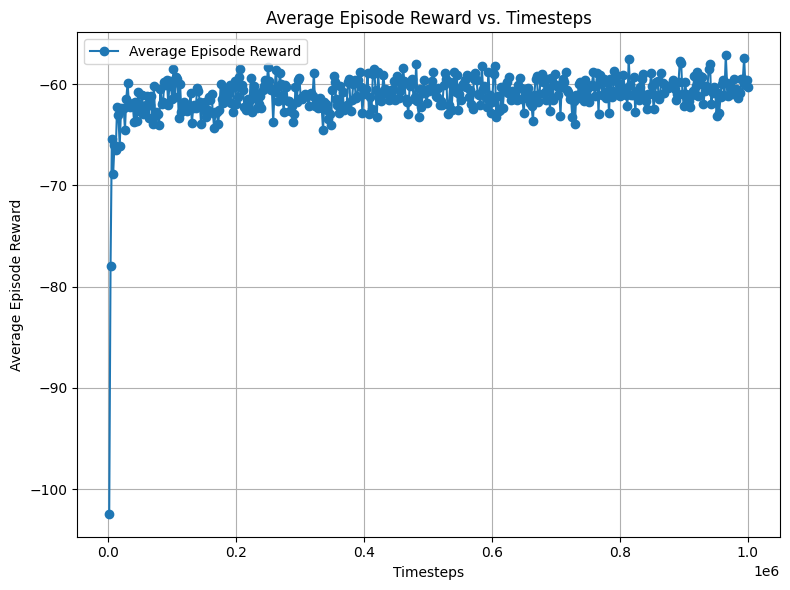

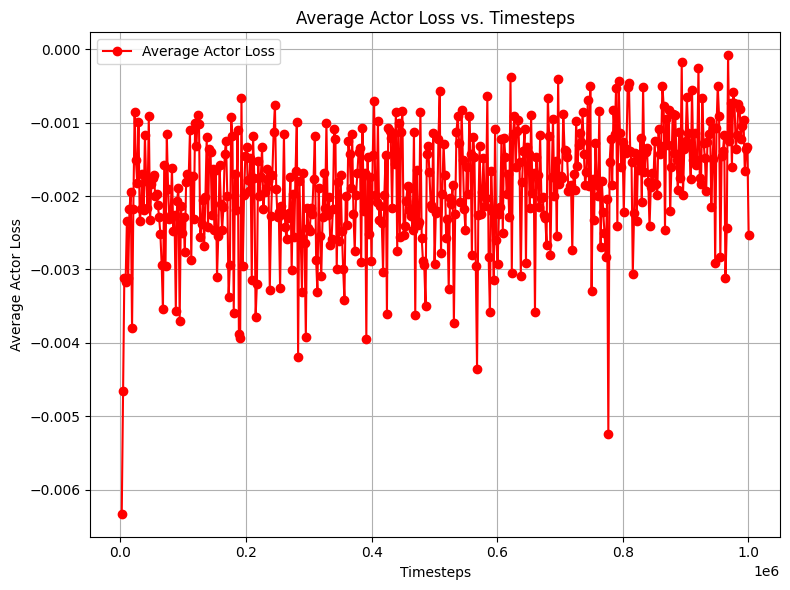

In [22]:
args = env_args["Reacher"]
metadata = main(args)
graph_metadata(metadata)

In [ ]:
# args = env_args["Swimmer"]
# metadata = main(args)
# metadata

Training starting...


/Users/nityam/dev/miniconda3/envs/drl_ppo/lib/python3.10/site-packages/gymnasium/envs/registration.py:519: DeprecationWarning: WARN: The environment Walker2d-v4 is out of date. You should consider upgrading to version `v5`.
  logger.deprecation(


Learning... Running 200 timesteps per episode, 2048 timesteps per batch for a total of 1000000.0 timesteps
Saved models to /Users/nityam/GT/CS 8803 DRL/ppo-delta/ppo-implementationWalker2d_ppo_actor.pth and /Users/nityam/GT/CS 8803 DRL/ppo-delta/ppo-implementationWalker2d_ppo_critic.pth
Saved models to /Users/nityam/GT/CS 8803 DRL/ppo-delta/ppo-implementationWalker2d_ppo_actor.pth and /Users/nityam/GT/CS 8803 DRL/ppo-delta/ppo-implementationWalker2d_ppo_critic.pth
Saved models to /Users/nityam/GT/CS 8803 DRL/ppo-delta/ppo-implementationWalker2d_ppo_actor.pth and /Users/nityam/GT/CS 8803 DRL/ppo-delta/ppo-implementationWalker2d_ppo_critic.pth
Saved models to /Users/nityam/GT/CS 8803 DRL/ppo-delta/ppo-implementationWalker2d_ppo_actor.pth and /Users/nityam/GT/CS 8803 DRL/ppo-delta/ppo-implementationWalker2d_ppo_critic.pth
Saved models to /Users/nityam/GT/CS 8803 DRL/ppo-delta/ppo-implementationWalker2d_ppo_actor.pth and /Users/nityam/GT/CS 8803 DRL/ppo-delta/ppo-implementationWalker2d_ppo

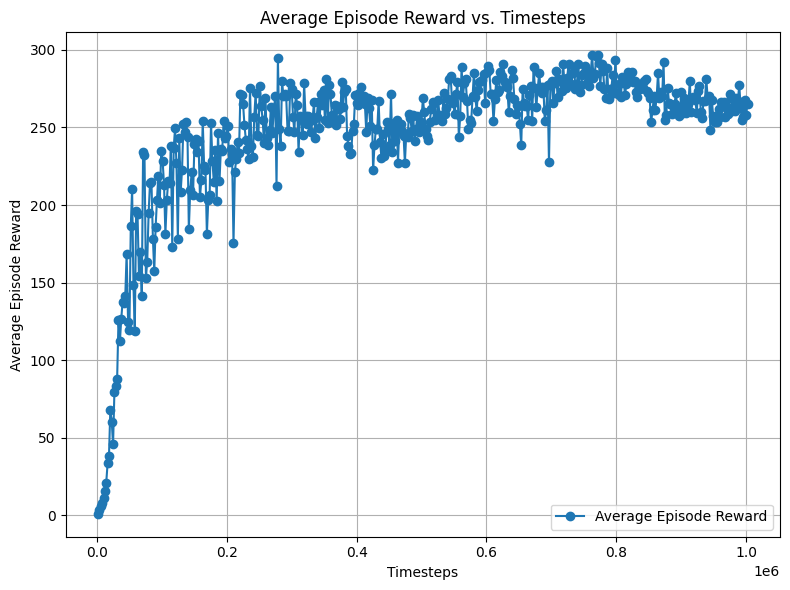

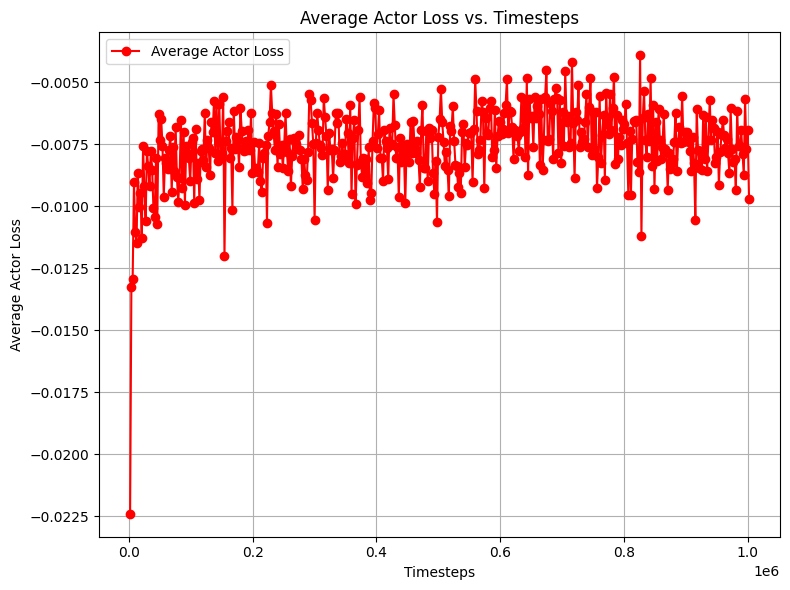

In [23]:
args = env_args["Walker2d"]
metadata = main(args)
graph_metadata(metadata)